In [1]:
import geopandas as gpd
import pandas as pd

Load data

In [2]:
df_countries_hr = gpd.read_file('WB_countries_Admin0.geojson')
df_countries_hr.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."


In [3]:
df_countries_hr.columns

Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN',
       'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR',
       'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

Grab Relevant Countries

In [4]:
df_countries_hr.FORMAL_EN.unique()

array(['Republic of Indonesia', 'Malaysia', 'Republic of Chile',
       'Plurinational State of Bolivia', 'Republic of Peru',
       'Argentine Republic', 'Republic of Cyprus', 'Republic of India',
       "People's Republic of China", 'State of Israel',
       'West Bank and Gaza', 'Lebanese Republic',
       'Federal Democratic Republic of Ethiopia',
       'Republic of South Sudan', 'Federal Republic of Somalia',
       'Republic of Kenya', 'Islamic Republic of Pakistan',
       'Republic of Malawi', 'United Republic of Tanzania',
       'Syrian Arab Republic', 'French Republic', 'Republic of Suriname',
       'Co-operative Republic of Guyana', 'Republic of Korea',
       "Democratic People's Republic of Korea", 'Kingdom of Morocco',
       'Republic of Costa Rica', 'Republic of Nicaragua',
       'Republic of the Congo', 'Democratic Republic of the Congo',
       'Kingdom of Bhutan', 'Ukraine', 'Republic of Belarus',
       'Republic of Namibia', 'Republic of South Africa',
       '

In [7]:
us_territories = ['American Samoa', 
                  'Commonwealth of Puerto Rico', 
                  'Virgin Islands of the United States', 
                  'Commonwealth of the Northern Mariana Islands',
                  'Territory of Guam']

us = ['United States of America']

central_america_mainland = ['Belize',
                            'United Mexican States',
                            'Republic of Costa Rica',
                            'Republic of Honduras',
                            'Republic of Panama',
                            'Republic of Nicaragua',
                            'Republic of El Salvador',
                            'Republic of Guatemala',
                           ]

In [8]:
countries = us_territories + us + central_america_mainland
df_north_america_temp = df_countries_hr[df_countries_hr.FORMAL_EN.isin(countries)].reset_index(drop=True)
df_north_america_temp.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,12,79260.0,...,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326,"MULTIPOLYGON (((-83.64436 10.92593, -83.65148 ..."
1,27,28,Admin-0 country,2,Sovereign country,Republic of Nicaragua,,6025951,13,33550.0,...,Nicaragua,Nikaragua,Nicaragua,尼加拉瓜,Nicaragua,None,LCR,22.117174,10.717862,"MULTIPOLYGON (((-85.70174 11.08088, -85.67758 ..."
2,112,113,Admin-0 country,2,Sovereign country,Republic of El Salvador,,6172011,13,54790.0,...,El Salvador,El Salvador,El Salvador,萨尔瓦多,El Salvador,None,LCR,8.557876,1.716492,"MULTIPOLYGON (((-90.09831 13.73140, -90.02117 ..."
3,113,114,Admin-0 country,2,Sovereign country,Republic of Guatemala,,15460732,14,131800.0,...,Guatemala,Guatemala,Guatemala,危地马拉,Guatemala,None,LCR,17.747934,9.174822,"POLYGON ((-89.36162 14.41548, -89.36379 14.446..."
4,131,132,Admin-0 country,2,Sovereign country,Republic of Honduras,,9038741,13,43190.0,...,Honduras,Honduras,Honduras,洪都拉斯,Honduras,None,LCR,25.891328,9.424318,"MULTIPOLYGON (((-89.36162 14.41548, -89.34621 ..."


<Axes: >

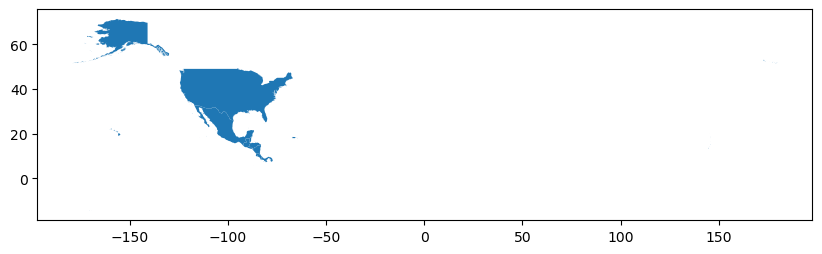

In [9]:
df_north_america_temp.plot(figsize=(10, 10))

In [12]:
df_us = df_countries_hr[df_countries_hr.FORMAL_EN.isin(us)].reset_index(drop=True)
df_us

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,149,150,Admin-0 country,2,Country,United States of America,,326625791,17,18560000.0,...,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,United States of America,None,Other,948.724319,1116.361761,"MULTIPOLYGON (((-95.16057 49.36949, -95.16034 ..."


Get US Mainland

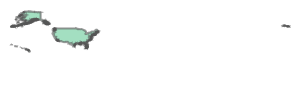

In [15]:
df_us.geometry[0]

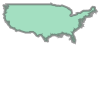

In [16]:
us_mainland_geo = df_us.geometry[0].geoms[0]
us_mainland_geo

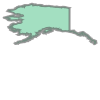

In [23]:
ak_geo = df_us.geometry[0].geoms[1]
ak_geo

/Users/cmarshak/mambaforge/envs/dswx_val/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/cmarshak/mambaforge/envs/dswx_val/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<Axes: >

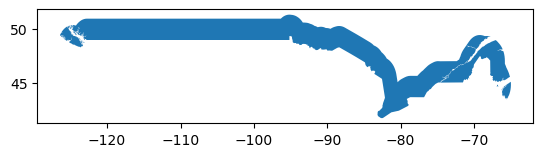

In [26]:
df_canada = df_countries_hr[df_countries_hr.FORMAL_EN == 'Canada'].reset_index(drop=True)
df_canada.geometry = df_canada.geometry.intersection(us_mainland_geo.buffer(2))
df_canada.plot()

/Users/cmarshak/mambaforge/envs/dswx_val/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/cmarshak/mambaforge/envs/dswx_val/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<Axes: >

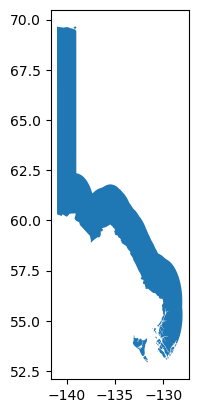

In [27]:
df_canada2 = df_countries_hr[df_countries_hr.FORMAL_EN == 'Canada'].reset_index(drop=True)
df_canada2.geometry = df_canada2.geometry.intersection(ak_geo.buffer(2))
df_canada2.plot()

In [37]:
df_north_america_opera = pd.concat([df_north_america_temp, 
                                    df_canada,
                                    df_canada2
                                   ], axis=0).reset_index(drop=True)
df_north_america_opera.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,12,79260.0,...,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326,"MULTIPOLYGON (((-83.64436 10.92593, -83.65148 ..."
1,27,28,Admin-0 country,2,Sovereign country,Republic of Nicaragua,,6025951,13,33550.0,...,Nicaragua,Nikaragua,Nicaragua,尼加拉瓜,Nicaragua,None,LCR,22.117174,10.717862,"MULTIPOLYGON (((-85.70174 11.08088, -85.67758 ..."
2,112,113,Admin-0 country,2,Sovereign country,Republic of El Salvador,,6172011,13,54790.0,...,El Salvador,El Salvador,El Salvador,萨尔瓦多,El Salvador,None,LCR,8.557876,1.716492,"MULTIPOLYGON (((-90.09831 13.73140, -90.02117 ..."
3,113,114,Admin-0 country,2,Sovereign country,Republic of Guatemala,,15460732,14,131800.0,...,Guatemala,Guatemala,Guatemala,危地马拉,Guatemala,None,LCR,17.747934,9.174822,"POLYGON ((-89.36162 14.41548, -89.36379 14.446..."
4,131,132,Admin-0 country,2,Sovereign country,Republic of Honduras,,9038741,13,43190.0,...,Honduras,Honduras,Honduras,洪都拉斯,Honduras,None,LCR,25.891328,9.424318,"MULTIPOLYGON (((-89.36162 14.41548, -89.34621 ..."


<Axes: >

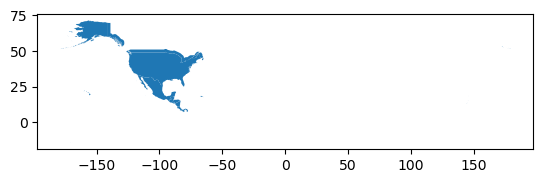

In [38]:
df_north_america_opera.plot()

In [39]:
df_north_america_opera.to_file('north_america_opera.geojson', driver='GeoJSON')

In [40]:
df_north_america_opera_dissolved = df_north_america_opera.dissolve(by='CONTINENT').reset_index(drop=False)
df_north_america_opera_dissolved.to_file('north_america_opera_dissolved.geojson', driver='GeoJSON')

<Axes: >

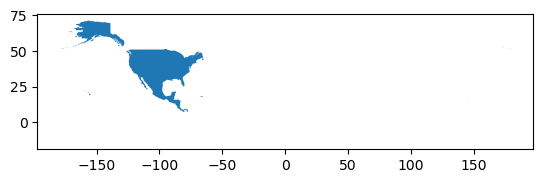

In [41]:
df_north_america_opera_dissolved.plot()